In [59]:
def merge_dict(dst:dict|None, src:dict|None) -> dict:
    if dst==None:
        dst={}
    if src==None:
        return dst
    for srckey,srcval in src.items():
        dst[srckey]=srcval
    return dst

from typing import Literal

def removebound(s:str,bounds:list[str],loc:Literal['prefix','suffix','p','s','l','r']) -> str:
    for bound in bounds:
        if loc in ['prefix','p','l']:
            s=s.removeprefix(bound)
        else:
            s=s.removesuffix(bound)
    return s

In [71]:
import pandas as pd
raw_pumpkins=pd.read_csv('../../data/ml/US-pumpkins.csv')

pumpkins=raw_pumpkins.copy(deep=True)
tail5row=pumpkins.tail(5)
colmiss=pumpkins.isnull().sum()
dataslice=pumpkins.loc[33:55, ['Package', 'Low Price', 'High Price', "Date"]]
# print(dataslice)

# filter by distinct column data
pumpkins=pumpkins[pumpkins['Package'].str.contains('bushel',case=True,regex=True)]

# create new column 
avgprice=(pumpkins['Low Price']+pumpkins['High Price'])/2
# pumpkins['Avg Price']=avgprice
# print(pumpkins['Avg Price'])
# extract column data
month=pd.DatetimeIndex(pumpkins['Date']).month

# create new DataFrame
newpumpkins=pd.DataFrame(
    merge_dict(dst={'Month':month,'Avg Price':avgprice},
               src={key:pumpkins[key] for key in ['Low Price', 'High Price','Package']})
)

for idx,pps in newpumpkins.iterrows():
    totprice=pps['Avg Price']
    weights=removebound(str(pps['Package']), ['bushel baskets','bushel cartons',' bushel crates'], 'suffix')
    newpumpkins.at[idx,'Avg Price']=totprice/(10/9) if weights in['1 1/9','1 1/9 '] \
                                    else totprice/(1/2) if weights=='1/2 ' \
                                    else totprice
print(f"max_price: {max(newpumpkins['Avg Price']):.3f}", f"min_price: {min(newpumpkins['Avg Price']):.3f}", '\n')

max_price: 51.500 min_price: 10.800 



In [72]:
from matplotlib import pyplot as plt
# plt.scatter(newpumpkins['Month'], newpumpkins['Avg Price'], )
# plt.xlabel('month')
# plt.ylabel('price')
# plt.title('pumpkins month price')
# plt.show()

Text(0, 0.5, 'pumpkins price')

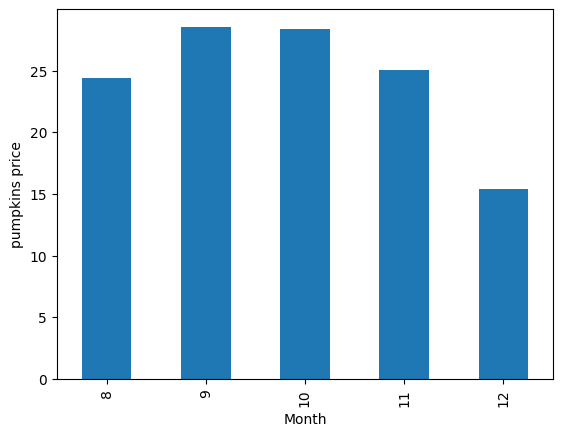

In [73]:
newpumpkins.groupby(['Month'])['Avg Price'].mean().plot(kind='bar')
plt.ylabel('pumpkins price')